### Proyecto Final   
#### **Predicción de Precios de Casas**

#### Curso desarrollo de APPS para Modelos de ML


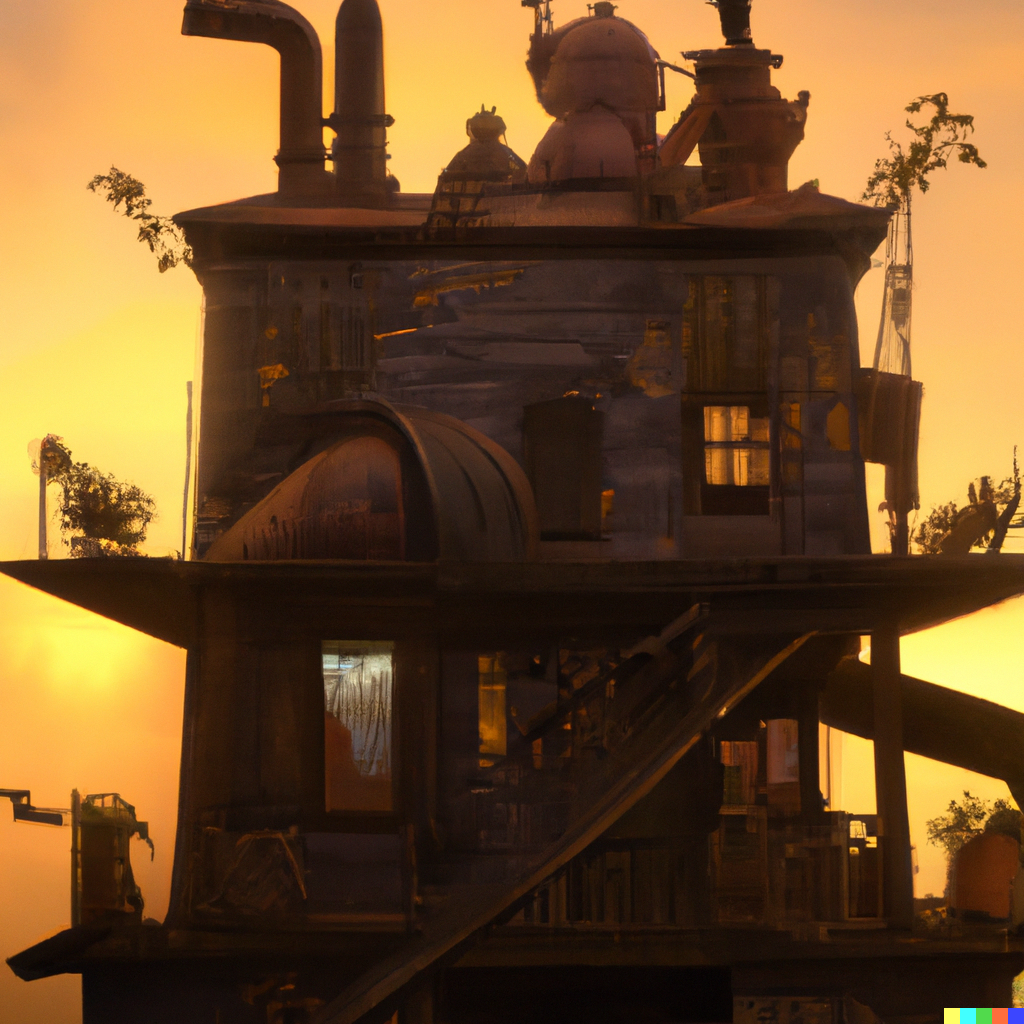

Data: The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.

The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

## Primero Identificar las variables características y variable a estimar

Las variables caracteristicas son: CRIM, ZN,INDUS,CHAS,NOX,RM,AGE, DIS, RAD, TAX, PTRATIO,B-100 y LSTAT

**La variable a estimar es: MEDV**

**Getting the Data**

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


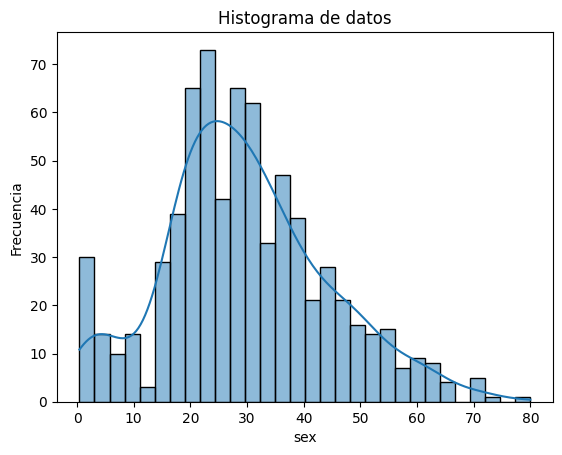

NameError: name 'px' is not defined

In [13]:

sns.histplot(titanic, x = "age", bins=30, kde=True)  # kde=True agrega la densidad estimada
plt.xlabel("sex")
plt.ylabel("Frecuencia")
plt.title('Histograma de datos')
plt.show()

fig = px.histogram(titanic, x="age", nbins=20, title="Distribución de Edades en el Titanic")



In [2]:
import pandas as pd
import numpy as np

boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
boston.columns = boston.columns.str.upper()


print("El conjunto de datos Boston tiene", boston.shape[0], "FILAS y", boston.shape[1], "COLUMNAS.")
boston.head()

El conjunto de datos Boston tiene 506 FILAS y 14 COLUMNAS.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
import numpy as np
np.mean(boston["MEDV"])

22.532806324110677

In [17]:
boston.shape

(506, 14)

**Data Types and Missing Values**

In [ ]:
# check data summary
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# check null value counts
boston.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


There are no null values in the Boston housing dataset

**Descriptive Statistics**

In [ ]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
boston.groupby('MEDV').size()

,0
MEDV,
5.0,2
5.6,1
6.3,1
7.0,2
7.2,3
...,...
46.7,1
48.3,1
48.5,1


### Split Data into Training and Testing sets

In [2]:
from sklearn import model_selection

#create train and test split
boston_train, boston_test = model_selection.train_test_split(boston,test_size=0.2,random_state=1)
print("Shape of the original boston data: ", boston.shape)
print("Shape of the boston train data = ", boston_train.shape)
print("Shape of the boston test data = ", boston_test.shape)

#Resetting index for prediction time
boston_train = boston_train.reset_index(drop=True)
boston_test = boston_test.reset_index(drop=True)

Shape of the original boston data:  (506, 14)
Shape of the boston train data =  (404, 14)
Shape of the boston test data =  (102, 14)


### Feature Selection


In the boston dataset, are there any columns that are not useful or have very low correlation?

- A correlation value can range between -1 to 1.
- Value closer to -1 means high negative correlation between two variables
- Value closer to +1 means high positive correlation between two variables
- Value closer to 0 means no or very low correlation between two variables

<Axes: >

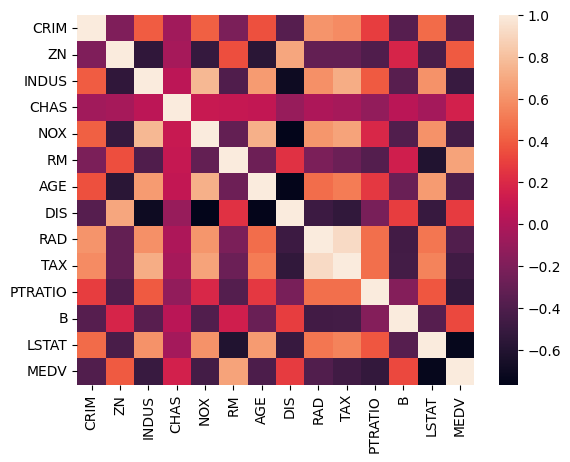

In [5]:
import seaborn as sns

boston_corr_matrix = boston_train.corr()
sns.heatmap(data=boston_corr_matrix, annot=False)

Since MEDV is our predict column, we want to pick features which have a positive and negative correlation with MEDV. Adding in columns which have a low or non-existent correlation would add to our 'Curse of Dimensionality' issue.

For this, let us pick only the top 4 most correlated features to MEDV for training our model.

In [ ]:
#printing all the correlations to MEDV in descending order
boston_corr_matrix['MEDV'].sort_values(ascending=False)

,MEDV
MEDV,1.000000
RM,0.670963
ZN,0.387510
B,0.329432
DIS,0.280202
CHAS,0.156214
CRIM,-0.392849
RAD,-0.393258
AGE,-0.413612
NOX,-0.449965


For this, let us pick 2 variables with high positive correlation (RM,ZN) and 2 with high negative correlation (PTRATIO, LSSTAT).

We will do this in the data pipeline section to ensure the same processes are done over the train and test datasets.

## Split Data into Features and Labels

For the Boston dataset, we are going to use only input columns we selected from the Feature Selection process (RM, ZN, PTRATIO, INDUS) and the output column would be 'MEDV'

In [6]:
#define input and predict to ccolumns
boston_features = ['RM', 'ZN', 'PTRATIO', 'LSTAT']
boston_labels = ['MEDV']

print('BOSTON DATASET')
print("Features - " + str(boston_features))
print("Labels - " + str(boston_labels))

boston_train_features = boston_train[boston_features]
boston_train_labels = boston_train[boston_labels]
print('✔ Train data split into features and labels')

boston_test_features = boston_test[boston_features]
boston_test_labels = boston_test[boston_labels]
print('✔ Test data split into features and labels')

BOSTON DATASET
Features - ['RM', 'ZN', 'PTRATIO', 'LSTAT']
Labels - ['MEDV']
✔ Train data split into features and labels
✔ Test data split into features and labels


## Creación de Modelos

### Regresión Lineal - Deciscion Tree

Tarea completar con el código correspondiente en los espacios en blanco

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# create the model object
model=LinearRegression()

# fit the model on train data
model=model.fit(boston_train_features, boston_train_labels)
print(model)

LinearRegression()


In [10]:
import pickle
pickle.dump(model, open("precios.pkl",'wb'))

In [11]:
filename = 'precios.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(boston_test_features[-1:])
print("Prediccion: {}".format(result))

Prediccion: [[18.05010234]]


### Predicting the Test set Results

In [63]:
boston_test_features

,RM,ZN,PTRATIO,LSTAT
0,6.849,33.0,18.4,7.53
1,6.696,55.0,17.6,7.18
2,6.030,0.0,17.9,18.80
3,5.878,12.5,18.9,8.10
4,5.362,0.0,20.2,10.19
...,...,...,...,...
97,6.442,28.0,18.2,8.16
98,8.266,0.0,17.4,4.14
99,6.195,0.0,20.9,13.00
100,5.837,0.0,20.2,15.69


In [12]:
#Predictions on the Test data
predictions_lr =model.predict(boston_test_features)
predictions_lr

array([[27.82947775],
       [28.17311394],
       [18.60031458],
       [23.34671079],
       [18.89240515],
       [21.22075059],
       [27.74511397],
       [19.13086889],
       [20.29466918],
       [26.10536662],
       [25.65467269],
       [30.37857737],
       [20.63396437],
       [24.28141898],
       [22.28226271],
       [18.68239917],
       [16.07300256],
       [37.80594867],
       [28.75149487],
       [11.15768204],
       [21.19649486],
       [21.48373647],
       [25.8104763 ],
       [25.92421402],
       [29.50968703],
       [12.51069998],
       [14.89194281],
       [22.5606189 ],
       [35.90263791],
       [12.67546007],
       [28.02531256],
       [15.93173797],
       [38.57374773],
       [18.58483302],
       [25.77976155],
       [20.01550662],
       [18.12817722],
       [30.07729826],
       [ 6.40963378],
       [18.9269812 ],
       [27.54083311],
       [24.55908272],
       [27.98516851],
       [13.70013605],
       [17.38913035],
       [17

In [13]:
#Putting the above predictions and probabilities together to create a readable df
lr_df = pd.DataFrame(predictions_lr.reshape(len(predictions_lr),1))
lr_df.rename(columns={0:'lr_prediction'}, inplace=True)
lr_df.head(5)

,lr_prediction
0,27.829478
1,28.173114
2,18.600315
3,23.346711
4,18.892405


In [14]:
#Concat the predictions of linear regression to the test dataset
boston_test_prediction = pd.concat([boston_test_labels, lr_df], axis=1)
boston_test_prediction.head(5)

,MEDV,lr_prediction
0,28.2,27.829478
1,23.9,28.173114
2,16.6,18.600315
3,22.0,23.346711
4,20.8,18.892405


In [15]:
# interpreting coefficients
# prints y-intercept
print(model.intercept_)

# prints the coefficient
print(model.coef_)

[24.28507347]
[[ 3.82478846e+00 -2.96289190e-03 -9.82968918e-01 -5.93249451e-01]]


The intercept will be your $b_0$ value; and coefficient will be $b_1$.

### Model Evaluation

There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE).

Mean Squared Error: It is simply the average of the squared difference between the target value and the value predicted by the regression model.

Root Mean Squared Error: It is the square root of the averaged squared difference between the target value and the value predicted by the model.

Mean Absolute Error: It is the absolute difference between the target value and the value predicted by the model.

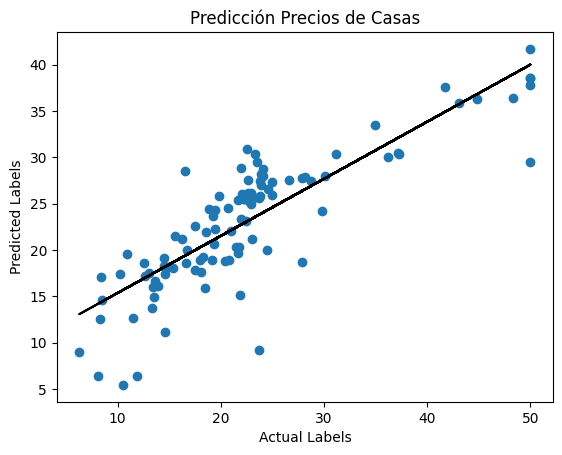

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np # Importing numpy for polyfit and poly1d

plt.scatter(boston_test_labels, predictions_lr)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicción Precios de Casas')
# overlay the regression line
z = np.polyfit(boston_test_labels.values.flatten(), predictions_lr.flatten(), 1) # flattening predictions_lr as well
p = np.poly1d(z)
plt.plot(boston_test_labels,p(boston_test_labels.values.flatten()), color='black') # flattening boston_test_labels for the plot
plt.show()

In [16]:
# import metrics library
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# print result of MAE
mae= mean_absolute_error(boston_test_labels, predictions_lr)
print("MAE:", mae)

#print result of MSE
mse = mean_squared_error(boston_test_labels, predictions_lr)
print("MSE:", mse)

#print result of RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

#print result of r2
r2 = r2_score(boston_test_labels, predictions_lr)
print("R2:", r2)

m1_lr = [mae, mse, rmse, r2]

print(m1_lr)


MAE: 4.28125545229612
MSE: 29.974477856213863
RMSE: 5.47489523700809
R2: 0.6966986781872812
[4.28125545229612, 29.974477856213863, 5.47489523700809, 0.6966986781872812]


# Tarea

Realizar el ejercicio utilizando regresiones Ridge, Lasso, ElasticNet y árboles de decisión

Seleccionar el mejor modelo en función de las métricas y sustentar la respuesta

Ridge

In [17]:
from sklearn.linear_model import Ridge

# create the model object
model1=Ridge()

# fit the model on train data
model1=model1.fit(boston_train_features, boston_train_labels)
print(model1)

Ridge()


In [18]:
#Predictions on the Test data}
predictions_lr =model1.predict(boston_test_features).flatten()

In [19]:
#Putting the above predictions and probabilities together to create a readable df
lr_df = pd.DataFrame(predictions_lr.reshape(len(predictions_lr),1))
lr_df.rename(columns={0:'lr_prediction'}, inplace=True)
lr_df.head(5)

,lr_prediction
0,27.821059
1,28.172785
2,18.597741
3,23.366729
4,18.923458


In [20]:
#Concat the predictions of linear regression to the test dataset
boston_test_prediction = pd.concat([boston_test_labels, lr_df], axis=1)
boston_test_prediction.head(5)

,MEDV,lr_prediction
0,28.2,27.821059
1,23.9,28.172785
2,16.6,18.597741
3,22.0,23.366729
4,20.8,18.923458


In [21]:
# interpreting coefficients
# prints y-intercept
print(model1.intercept_)

# prints the coefficient
print(model1.coef_)

[24.52654272]
[ 3.79233626e+00 -2.88242495e-03 -9.83940389e-01 -5.94896599e-01]


Ecuacion de regresion lineal para modelo Ridge

24.52654272 + 3.79233626e+00(RM) - 2.88242495e-03(ZN) - 9.83940389e-01(PTRATIO) - 5.94896599e-01(LSTAT)

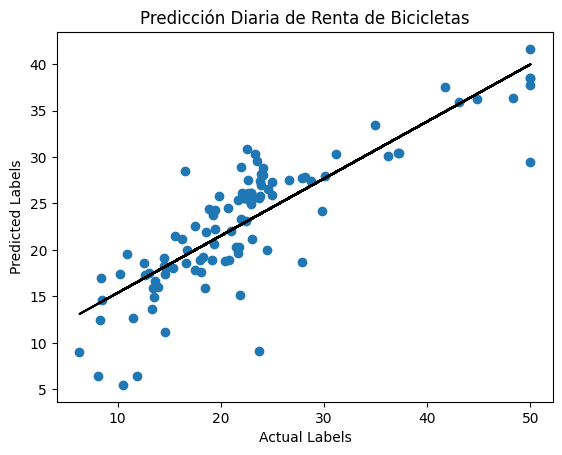

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(boston_test_labels, predictions_lr)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicción de Precios de Casas')
# overlay the regression line
z = np.polyfit(boston_test_labels.values.flatten(), predictions_lr, 1)
p = np.poly1d(z)
plt.plot(boston_test_labels,p(boston_test_labels), color='black')
plt.show()

In [23]:
# import metrics library
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# print result of MAE
mae= mean_absolute_error(boston_test_labels, predictions_lr)
print("MAE:", mae)

#print result of MSE
mse = mean_squared_error(boston_test_labels, predictions_lr)
print("MSE:", mse)

#print result of RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

#print result of r2
r2 = r2_score(boston_test_labels, predictions_lr)
print("R2:", r2)

m2_ridge = [mae, mse, rmse, r2]

print(m2_ridge)


MAE: 4.284235439878641
MSE: 30.043455296930755
RMSE: 5.481191047293531
R2: 0.6960007194423432
[4.284235439878641, 30.043455296930755, 5.481191047293531, 0.6960007194423432]


Lasso

In [24]:
from sklearn.linear_model import Lasso

# create the model object
model2=Lasso()

# fit the model on train data
model2=model2.fit(boston_train_features, boston_train_labels)
print(model2)

Lasso()


In [25]:
#Predictions on the Test data}
predictions_lr =model2.predict(boston_test_features).flatten()

In [26]:
#Putting the above predictions and probabilities together to create a readable df
lr_df = pd.DataFrame(predictions_lr.reshape(len(predictions_lr),1))
lr_df.rename(columns={0:'lr_prediction'}, inplace=True)
lr_df.head(5)

,lr_prediction
0,27.095130
1,28.198027
2,18.209887
3,25.377789
4,22.178198


In [ ]:
#Concat the predictions of linear regression to the test dataset
boston_test_prediction = pd.concat([boston_test_labels, lr_df], axis=1)
boston_test_prediction.head(5)

,MEDV,lr_prediction
0,28.2,27.095130
1,23.9,28.198027
2,16.6,18.209887
3,22.0,25.377789
4,20.8,22.178198


In [27]:
# interpreting coefficients
# prints y-intercept
print(model2.intercept_)

# prints the coefficient
print(model2.coef_)

[44.46238742]
[ 0.6526011   0.01008451 -0.89743103 -0.75125901]


Ecuacion de regresion lineal para modelo Lasso

44.46238742 + 0.6526011(RM) + 0.01008451(ZN) -0.89743103(PTRATIO) - 0.751259011(LSTAT)

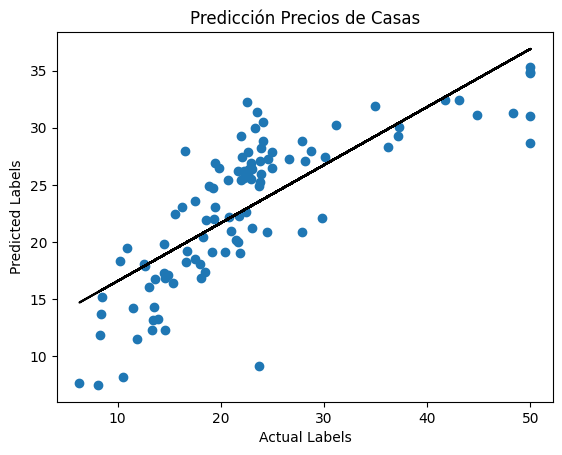

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(boston_test_labels, predictions_lr)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicción Precios de Casas')
# overlay the regression line
z = np.polyfit(boston_test_labels.values.flatten(), predictions_lr, 1)
p = np.poly1d(z)
plt.plot(boston_test_labels,p(boston_test_labels), color='black')
plt.show()

In [28]:
# import metrics library
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# print result of MAE
mae= mean_absolute_error(boston_test_labels, predictions_lr)
print("MAE:", mae)

#print result of MSE
mse = mean_squared_error(boston_test_labels, predictions_lr)
print("MSE:", mse)

#print result of RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

#print result of r2
r2 = r2_score(boston_test_labels, predictions_lr)
print("R2:", r2)

m3_lasso = [mae, mse, rmse, r2]

print(m3_lasso)

MAE: 4.6836383673207
MSE: 40.65734678987852
RMSE: 6.376311378052245
R2: 0.5886024409859107
[4.6836383673207, 40.65734678987852, 6.376311378052245, 0.5886024409859107]


Elasticnet

In [29]:
from sklearn.linear_model import ElasticNet

# create the model object
model3=ElasticNet()

# fit the model on train data
model3=model3.fit(boston_train_features, boston_train_labels)
print(model3, "n")

ElasticNet() n


In [30]:
#Predictions on the Test data}
predictions_lr =model3.predict(boston_test_features).flatten()

In [31]:
#Putting the above predictions and probabilities together to create a readable df
lr_df = pd.DataFrame(predictions_lr.reshape(len(predictions_lr),1))
lr_df.rename(columns={0:'lr_prediction'}, inplace=True)
lr_df.head(5)

,lr_prediction
0,27.168529
1,28.236974
2,18.215180
3,25.252302
4,21.966474


In [32]:
#Concat the predictions of linear regression to the test dataset
boston_test_prediction = pd.concat([boston_test_labels, lr_df], axis=1)
boston_test_prediction.head(5)

,MEDV,lr_prediction
0,28.2,27.168529
1,23.9,28.236974
2,16.6,18.215180
3,22.0,25.252302
4,20.8,21.966474


In [33]:
# interpreting coefficients
# prints y-intercept
print(model3.intercept_)

# prints the coefficient
print(model3.coef_)

[42.98384709]
[ 0.86161639  0.01021165 -0.89505437 -0.74163514]


Ecuacion de regresion lineal para modelo ElasticNet

42.98384709 + 0.86161639 (RM) + 0.01021165(ZN) -0.89505437(PTRATIO) -0.74163514(LSTAT)

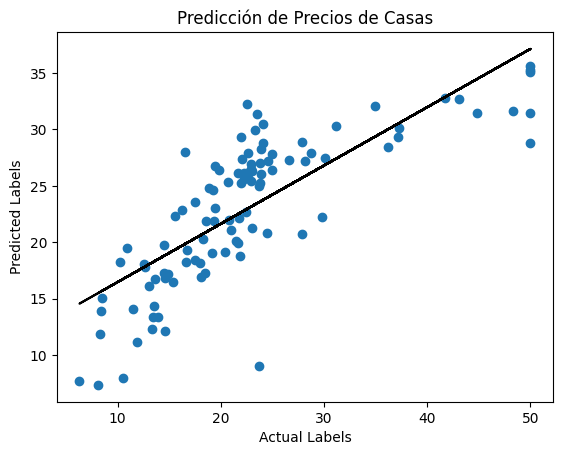

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(boston_test_labels, predictions_lr)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicción de Precios de Casas')
# overlay the regression line
z = np.polyfit(boston_test_labels.values.flatten(), predictions_lr, 1)
p = np.poly1d(z)
plt.plot(boston_test_labels,p(boston_test_labels), color='black')
plt.show()

In [34]:
# import metrics library
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# print result of MAE
mae= mean_absolute_error(boston_test_labels, predictions_lr)
print("MAE:", mae)

#print result of MSE
mse = mean_squared_error(boston_test_labels, predictions_lr)
print("MSE:", mse)

#print result of RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

#print result of r2
r2 = r2_score(boston_test_labels, predictions_lr)
print("R2:", r2)

m4_elasticnet = [mae, mse, rmse, r2]

print(m4_elasticnet)

MAE: 4.646618749208221
MSE: 39.741906856096485
RMSE: 6.304118245726081
R2: 0.5978654594540933
[4.646618749208221, 39.741906856096485, 6.304118245726081, 0.5978654594540933]


Arbol de decisión

In [35]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
model4 = DecisionTreeRegressor()
model = model4.fit(boston_train_features, boston_train_labels)
print (model4, "\n")


DecisionTreeRegressor() 



In [36]:
#Predictions on the Test data}
predictions_lr =model4.predict(boston_test_features).flatten()

In [37]:
#Putting the above predictions and probabilities together to create a readable df
lr_df = pd.DataFrame(predictions_lr.reshape(len(predictions_lr),1))
lr_df.rename(columns={0:'lr_prediction'}, inplace=True)
lr_df.head(5)

,lr_prediction
0,28.0
1,28.0
2,17.8
3,20.9
4,20.2


In [ ]:
#Concat the predictions of linear regression to the test dataset
boston_test_prediction = pd.concat([boston_test_labels, lr_df], axis=1)
boston_test_prediction.head(5)

,MEDV,lr_prediction
0,28.2,28.0
1,23.9,28.0
2,16.6,17.8
3,22.0,21.1
4,20.8,20.2


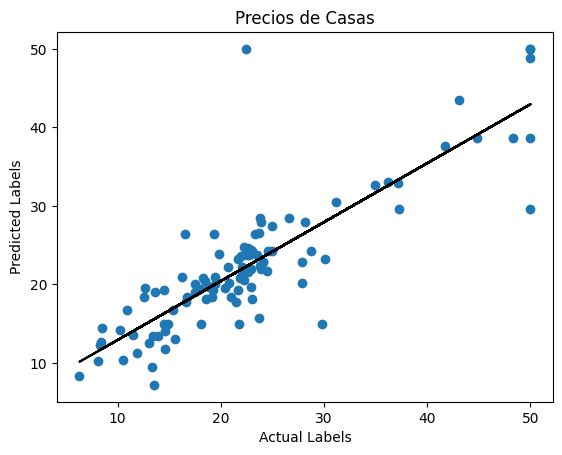

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot predicted vs actual
plt.scatter(boston_test_labels, predictions_lr)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Precios de Casas')

# overlay the regression line
z = np.polyfit(boston_test_labels.values.flatten(), predictions_lr, 1)
p = np.poly1d(z)
plt.plot(boston_test_labels,p(boston_test_labels), color='black')
plt.show()

In [38]:
# Evaluate the model using the test data

# print result of MAE
mae= mean_absolute_error(boston_test_labels, predictions_lr)
print("MAE:", mae)

# print result of MSE
mse = mean_squared_error(boston_test_labels, predictions_lr)
print("MSE:", mse)

# print result of RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# print result of r2
r2 = r2_score(boston_test_labels, predictions_lr)
print("R2:", r2)

m5_dTree = [mae, mse, rmse, r2]

print(m5_dTree)

MAE: 3.5509803921568626
MSE: 38.83901960784314
RMSE: 6.232095924152897
R2: 0.607001461660928
[3.5509803921568626, 38.83901960784314, 6.232095924152897, 0.607001461660928]


Conclusiones

Con todos los datos recogidos, determinamos que aquellas caracteristicas que afectan el precio de las viviendas en Boston son:  número promedio de cuartos por vivienda(RM), proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados(ZN), ratio alumno-profesor por localidad(PTRATIO) y % estrato socioeconomico más bajo de la población(LSTAT). Con estas caracteristicas, puse a prueba, cinco algoritmos y obtuve que el algoritmo por arbol de decisión, es con el que conseguimos el menor error al estimar el precio medio de una vivienda con respecto a precios actuales del mercado.

Logra reducir las valoraciones subjetivas de los  asesores inmobiliarios, evita sobrevalorar o infravalorar el precio las viviendas, coadyuda en la lucha contra la burbuja inmobiliaria y aumenta la confianza en los vendedores y compradores; siendo la confianza uno de los impulsadores más eficaces para cerrar ventas.

In [48]:
len(m5_dTree)

4

In [52]:
metrics = pd.DataFrame(
    {
        "metrica":["MAE", "MSE", "RMSE", "R2"],
        "m1_lr":m1_lr,
        "m2_ridge": m2_ridge,
        "m3_lasso": m3_lasso,
        "m4_elasticnet": m4_elasticnet,
        "m5_dTree": m5_dTree
    }
)

metrics

,metrica,m1_lr,m2_ridge,m3_lasso,m4_elasticnet,m5_dTree
0,MAE,4.281255,4.284235,4.683638,4.646619,3.550980
1,MSE,29.974478,30.043455,40.657347,39.741907,38.839020
2,RMSE,5.474895,5.481191,6.376311,6.304118,6.232096
3,R2,0.696699,0.696001,0.588602,0.597865,0.607001


In [55]:
metrics.to_csv("metricas.csv", index=False)

In [58]:
metrics.loc[metrics['metrica'] == "MAE"]

,metrica,m1_lr,m2_ridge,m3_lasso,m4_elasticnet,m5_dTree
0,MAE,4.281255,4.284235,4.683638,4.646619,3.55098


In [62]:
rm = 5
zn = 6
ptratio = 7
indus = 9


input = pd.DataFrame({
            "rm": [rm],
            "zn": [zn],
            "ptratio": [ptratio],
            "indus": [indus]
        })

input


,rm,zn,ptratio,indus
0,5,6,7,9
